| Elemento | Descripción |
|-----------|-------------|
| **Escudos** | <p align="center"><img src="./Imagenes/TECNM.png" width="150"/> <img src="./Imagenes/MSC.png" width="150"/></p> |
| **Maestría** | Maestría en Sistemas Computacionales |
| **Asignatura** | Visión Artificial |
| **Proyecto** | Compresión de Imágenes con SVD |
| **Autor** | Alan García Díaz |
| **Fecha de entrega** | 11/10/2025 |


## Introducción

La visión artificial se ha convertido en un área fundamental dentro de la informática, permitiendo a las máquinas interpretar y procesar imágenes de manera similar a los humanos. Una de las técnicas más importantes en procesamiento de imágenes es la **descomposición en valores singulares (SVD)**, que permite reducir la dimensionalidad de una imagen y realizar compresión de manera eficiente.

En este proyecto se trabajará con imágenes a color, convirtiéndolas a escala de grises y representándolas como matrices. Posteriormente, se calculará la descomposición SVD utilizando **Numpy** y se reconstruirán las imágenes usando un número reducido de valores singulares, logrando así una compresión visualmente aceptable. Finalmente, se calculará el porcentaje de compresión respecto a la imagen original y se visualizarán los valores singulares en escala logarítmica.

## Enunciado del Problema

Dada una imagen a color, se debe:

1. Convertirla a escala de grises.
2. Representarla como matriz y calcular su descomposición de valores singulares (SVD) usando `numpy.linalg.svd`.
3. Seleccionar un número menor de valores singulares para reconstruir la imagen.
4. Calcular el porcentaje de compresión obtenido respecto al tamaño original.
5. Graficar los valores singulares de la imagen original en escala logarítmica.

## Importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

## Cargar imagen y convertir a escala de grises

Dimensiones de la imagen: (1520, 720)


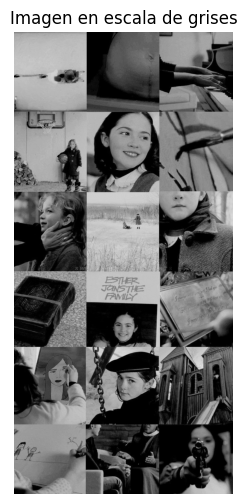

In [2]:
# Cargar imagen desde archivo
img_color = Image.open("./Imagenes/OrphanCollage.jpg")

# Convertir a escala de grises
img_gray = img_color.convert("L")
img_array = np.array(img_gray)

print("Dimensiones de la imagen:", img_array.shape)

plt.figure(figsize=(6,6))
plt.imshow(img_array, cmap="gray")
plt.title("Imagen en escala de grises")
plt.axis("off")
plt.show()

## Descomposición en Valores Singulares (SVD)

In [3]:
# Aplicar SVD: M = U Σ V^T
U, S, VT = np.linalg.svd(img_array, full_matrices=False)

print("Tamaño U:", U.shape)
print("Tamaño Σ:", S.shape)
print("Tamaño V^T:", VT.shape)

Tamaño U: (1520, 720)
Tamaño Σ: (720,)
Tamaño V^T: (720, 720)


## Reconstrucción de la imagen con k valores singulares

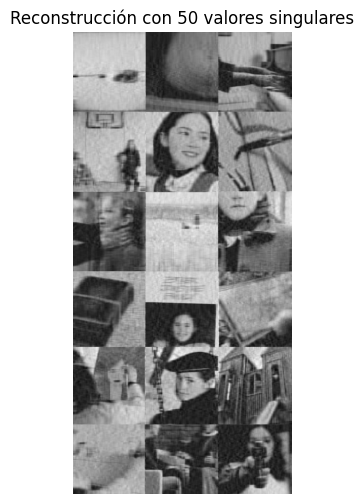

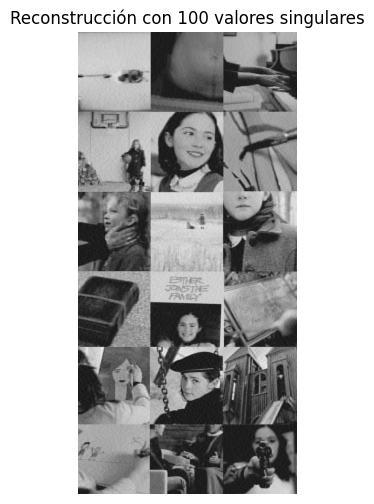

In [4]:
def reconstruir_varios(U, S, VT, ks):
    """
    Reconstruye y muestra la imagen usando varios valores singulares
    """
    for k in ks:
        img_recon = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))
        plt.figure(figsize=(6,6))
        plt.imshow(img_recon, cmap="gray")
        plt.title(f"Reconstrucción con {k} valores singulares")
        plt.axis("off")
        plt.show()

# Ejemplo con 50 y 100 valores singulares
reconstruir_varios(U, S, VT, ks=[50, 100])


## Compresión lograda

In [5]:
def calcular_compresion(m, n, k):
    """
    Calcula el porcentaje de compresión lograda con k valores singulares
    """
    original = m * n
    comprimido = k * (m + n + 1)
    return (1 - comprimido/original) * 100

m, n = img_array.shape

for k in [m, m//2, m//4, m//8, m//16, m//32]:
    compresion = calcular_compresion(m, n, k)
    print(f"k = {k:3d} -> Compresión: {compresion:.2f}%")

k = 1520 -> Compresión: -211.25%
k = 760 -> Compresión: -55.62%
k = 380 -> Compresión: 22.19%
k = 190 -> Compresión: 61.09%
k =  95 -> Compresión: 80.55%
k =  47 -> Compresión: 90.38%


## Gráfico de los valores singulares

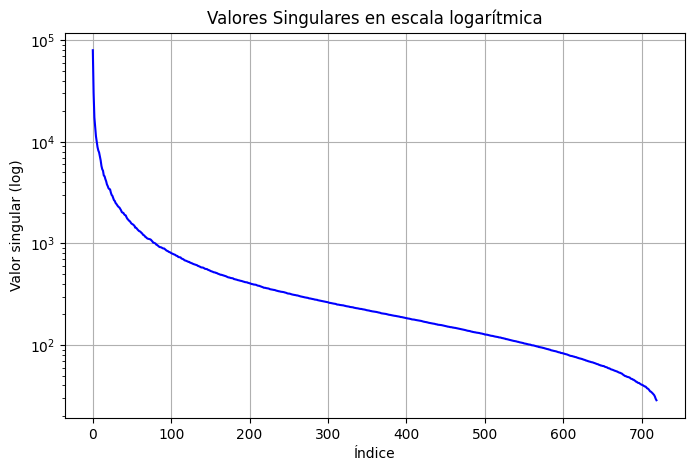

In [6]:
plt.figure(figsize=(8,5))
plt.semilogy(S, 'b-')
plt.title("Valores Singulares en escala logarítmica")
plt.xlabel("Índice")
plt.ylabel("Valor singular (log)")
plt.grid(True)
plt.show()

## Ejecuciones con Ejemplos No Triviales

| Valor de k | Imagen Reconstruida |
|------------|-------------------|
| 50         | ![Reconstrucción 50](./Imagenes/Recon50.png) |
| 100        | ![Reconstrucción 100](./Imagenes/Recon100.png) |


## Conclusiones

La práctica realizada permitió comprender y aplicar la **descomposición en valores singulares (SVD)** para la compresión de imágenes en escala de grises. Los principales aprendizajes y conclusiones son:

* Los primeros valores singulares contienen la mayor parte de la información visual de la imagen, por lo que se puede lograr una buena reconstrucción usando solo un subconjunto de estos valores.
* Reducir el número de valores singulares permite disminuir significativamente el tamaño de almacenamiento, logrando una **compresión eficiente**, similar al formato JPG.
* Existe un **balance entre calidad visual y compresión**: a medida que se disminuye `k`, la calidad de la imagen reconstruida disminuye y se pierde detalle.
* La representación de los valores singulares en escala logarítmica muestra claramente que los valores más pequeños tienden a cero y aportan poco a la reconstrucción visual.
* Este proyecto refuerza el entendimiento de cómo las técnicas de álgebra lineal pueden aplicarse en visión artificial y procesamiento de imágenes, y proporciona herramientas prácticas para optimización de almacenamiento y transmisión de imágenes.

## Referencias

1. NumPy Documentation. [https://numpy.org/doc/stable/](https://numpy.org/doc/stable/)
2. Pillow (PIL Fork) Documentation. [https://pillow.readthedocs.io/en/stable/](https://pillow.readthedocs.io/en/stable/)
3. **Fallas-Monge, J. J., Chavarría-Molina, J., & Soto-Quiros, P.** (2021). *Descomposición en valores singulares de una matriz: Un repaso por los fundamentos teóricos y sus aplicaciones en el procesamiento de imágenes*. Revista Investigación Operacional, 42(2), 148-173. Recuperado de [https://rev-inv-ope.pantheonsorbonne.fr/sites/default/files/inline-files/42221-03.pdf](https://rev-inv-ope.pantheonsorbonne.fr/sites/default/files/inline-files/42221-03.pdf)